In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop('RowNumber',inplace=True,axis=1)

In [5]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [7]:
df.drop(['CustomerId','Surname','Gender','Geography'],inplace=True,axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 703.2 KB


In [9]:
df.shape

(10000, 9)

In [10]:
df['NumOfProducts'].nunique()

4

Text(0.5, 1.0, 'Number of customer churn')

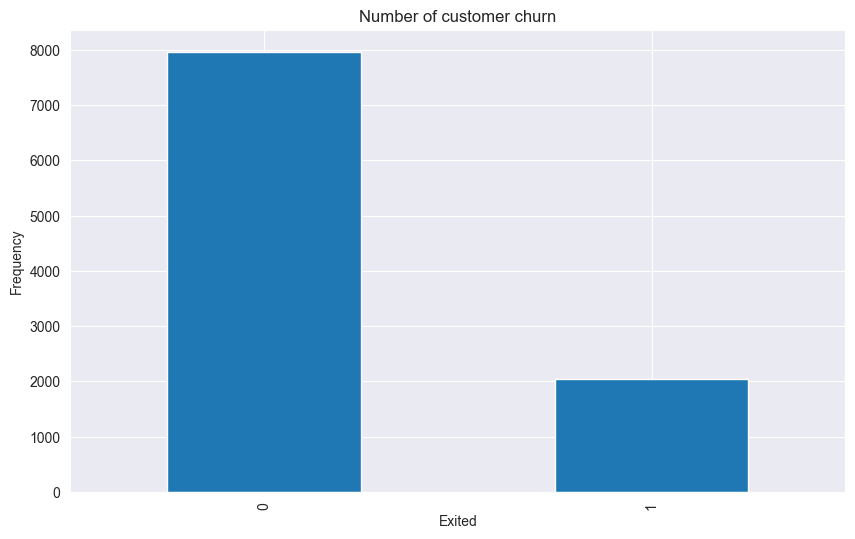

In [11]:
plt.figure(figsize=(10,6))
df['Exited'].value_counts().plot(kind='bar')
plt.xlabel('Exited')
plt.ylabel('Frequency')
plt.title('Number of customer churn')

In [12]:
category_col = [col for col in df.columns if df[col].nunique() < 10]

In [13]:
category_col

['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

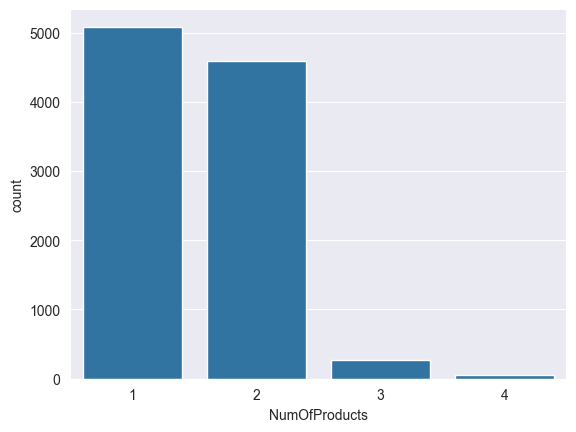

               NumOfProducts  Ratio
NumOfProducts                      
1                       5084  50.84
2                       4590  45.90
3                        266   2.66
4                         60   0.60
##########################################


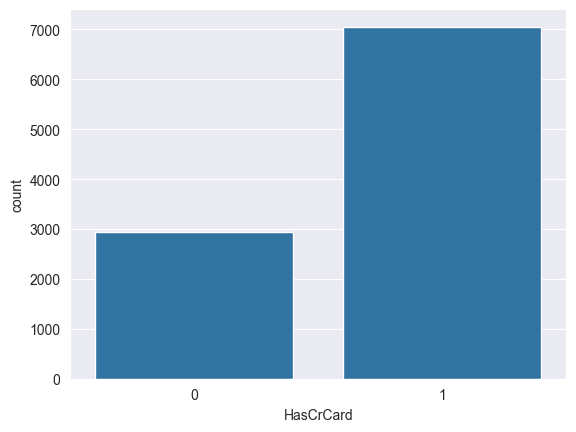

           HasCrCard  Ratio
HasCrCard                  
1               7055  70.55
0               2945  29.45
##########################################


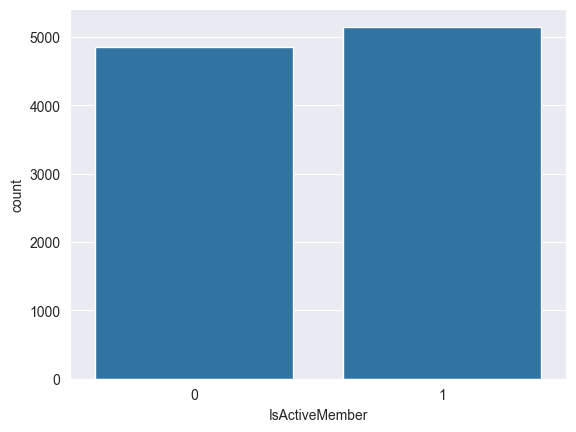

                IsActiveMember  Ratio
IsActiveMember                       
1                         5151  51.51
0                         4849  48.49
##########################################


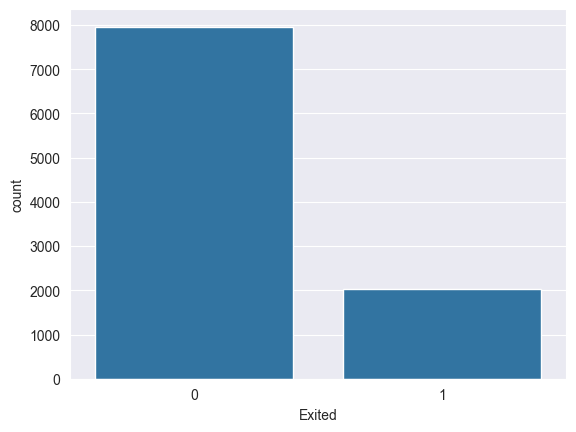

        Exited  Ratio
Exited               
0         7963  79.63
1         2037  20.37
##########################################


In [14]:
def col_summary(dataframe, col_name):
    sns.countplot(x=dataframe[col_name], data=df)
    plt.show(block=True)
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")


for col in category_col:
    col_summary(df,col)

In [15]:
gender = df[df['Exited'] == 1]['IsActiveMember'].value_counts()
print(gender)
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100] # Female / Male
print(gender)

IsActiveMember
0    1302
1     735
Name: count, dtype: int64
[63.91752577319587, 36.08247422680412]


In [16]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [17]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [18]:
df.loc[1]

CreditScore           608.00
Age                    41.00
Tenure                  1.00
Balance             83807.86
NumOfProducts           1.00
HasCrCard               0.00
IsActiveMember          1.00
EstimatedSalary    112542.58
Exited                  0.00
Name: 1, dtype: float64

In [19]:
df[df["Age"]>25][['Exited']].count()

Exited    9389
dtype: int64

In [20]:
ge_greater_25_exited_yes= df.Exited[(df["Age"] > 25) & (df["Exited"] == 1)].count()
age_less_25_exited_yes=df.Exited[(df["Age"] <= 25) & (df["Exited"] == 1)].count()

In [21]:
round(age_less_25_exited_yes)

46

In [22]:
df[(df["HasCrCard"] == 1)].count()[0]

7055

In [23]:
df[(df["Exited"] == 1)].count()[0]

2037

In [24]:
print(f'Probability of a customer being exited given they have a credit card, {round(df[(df["HasCrCard"] == 1) & (df["Exited"] == 1)].count()[0] / df[(df["Exited"] == 1)].count()[0] *100,2)} % ')
print(f'Probability of a customer being exited given they do not have a credit card, {round(df[(df["HasCrCard"] == 0) & (df["Exited"] == 1)].count()[0] / df[(df["Exited"] == 1)].count()[0] *100,2)} % ')

Probability of a customer being exited given they have a credit card, 69.91 % 
Probability of a customer being exited given they do not have a credit card, 30.09 % 


In [25]:
print(f'Probability of a customer being exited given they are activeMember, {round(df[(df["IsActiveMember"] == 1) & (df["Exited"] == 1)].count()[0] / df[(df["Exited"] == 1)].count()[0] *100,2)} % ')
print(f'Probability of a customer being exited given they are not active Member, {round(df[(df["IsActiveMember"] == 0) & (df["Exited"] == 1)].count()[0] / df[(df["Exited"] == 1)].count()[0] *100,2)} % ')

Probability of a customer being exited given they are activeMember, 36.08 % 
Probability of a customer being exited given they are not active Member, 63.92 % 


In [26]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [27]:
y = df.iloc[:, -1].values
x = df.iloc[:, :-1].values

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler)
X_norm = scaler.fit_transform(x)
#X_test_norm = scaler.fit_transform(x_test)
print(X_norm)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

MinMaxScaler()
[[0.538      0.32432432 0.2        ... 1.         1.         0.50673489]
 [0.516      0.31081081 0.1        ... 0.         1.         0.56270874]
 [0.304      0.32432432 0.8        ... 1.         0.         0.56965435]
 ...
 [0.718      0.24324324 0.7        ... 0.         1.         0.21039009]
 [0.844      0.32432432 0.3        ... 1.         0.         0.46442905]
 [0.884      0.13513514 0.4        ... 1.         0.         0.19091423]]
Peak to Peak range by column in Raw        X:[5.0000000e+02 7.4000000e+01 1.0000000e+01 2.5089809e+05 3.0000000e+00
 1.0000000e+00 1.0000000e+00 1.9998090e+05]
Peak to Peak range by column in Normalized X:[1. 1. 1. 1. 1. 1. 1. 1.]


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [34]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy = 1)
x_resam, y_resam = over.fit_resample(X_norm, y)
Counter(y_resam)

Counter({1: 7963, 0: 7963})

In [35]:
from sklearn.model_selection import train_test_split
# split into train test sets
x_train, x_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=1)
x_train_re, x_test_re, y_train_re, y_test_re = train_test_split(x_resam, y_resam, test_size=0.33, random_state=1)

In [36]:
def model(classifier,xtrain,ytrain):
    classifier.fit(xtrain,ytrain)
    return classifier

In [37]:
def model_evaluation(classifier,xtest,ytest):
    y_pred=classifier.predict(xtest)
    acc=accuracy_score(ytest,y_pred)
    #cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(acc))
    #print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(ytest,y_pred)))
    print("#########  Confusion Matrix  ########")
    cm = confusion_matrix(ytest,y_pred)
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

    # Classification Report
    print(classification_report(ytest,y_pred))
    data= {
        'ytest': ytest,
        'ypred': y_pred
    }



    df2 = pd.DataFrame(data)
    print(df2.head(20))

Decision tree Classifier model for imbalanced dataset
Accuracy :  84.91%
ROC_AUC Score :  69.13%
#########  Confusion Matrix  ########
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2609
           1       0.75      0.42      0.54       691

    accuracy                           0.85      3300
   macro avg       0.81      0.69      0.72      3300
weighted avg       0.84      0.85      0.83      3300

    ytest  ypred
0       0      0
1       0      0
2       0      0
3       0      0
4       0      0
5       0      0
6       0      0
7       0      0
8       0      0
9       0      0
10      0      0
11      1      0
12      0      0
13      0      0
14      0      0
15      0      0
16      0      0
17      0      0
18      0      0
19      0      0


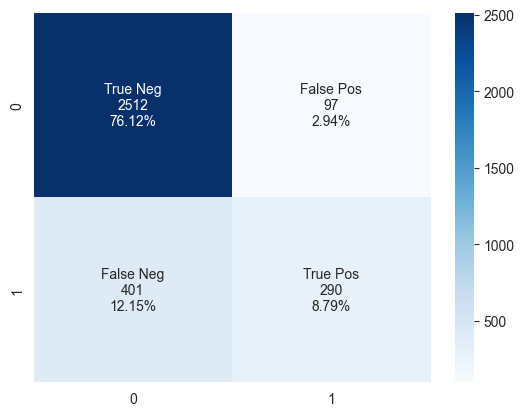

In [38]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
print("Decision tree Classifier model for imbalanced dataset")
classifier=model(classifier_dt,x_train,y_train)
model_evaluation(classifier,x_test,y_test)

Decision tree Classifier model for balanced dataset
Accuracy :  73.10%
ROC_AUC Score :  73.44%
#########  Confusion Matrix  ########
              precision    recall  f1-score   support

           0       0.68      0.85      0.75      2551
           1       0.82      0.62      0.70      2705

    accuracy                           0.73      5256
   macro avg       0.75      0.73      0.73      5256
weighted avg       0.75      0.73      0.73      5256

    ytest  ypred
0       0      0
1       1      1
2       1      1
3       1      0
4       1      1
5       0      0
6       0      1
7       0      0
8       1      0
9       1      1
10      1      0
11      1      1
12      1      0
13      0      0
14      0      0
15      0      0
16      0      0
17      1      1
18      1      1
19      0      0


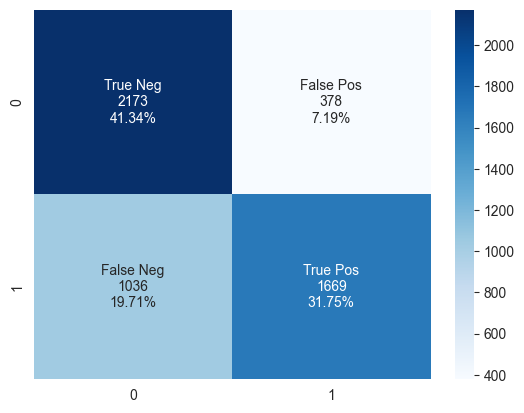

In [39]:
print("Decision tree Classifier model for balanced dataset")
classifier=model(classifier_dt,x_train_re,y_train_re)
model_evaluation(classifier,x_test_re,y_test_re)

Logistic regression model for imbalanced dataset
Accuracy :  80.79%
ROC_AUC Score :  57.05%
#########  Confusion Matrix  ########
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      2609
           1       0.67      0.16      0.26       691

    accuracy                           0.81      3300
   macro avg       0.74      0.57      0.58      3300
weighted avg       0.78      0.81      0.76      3300

    ytest  ypred
0       0      0
1       0      0
2       0      0
3       0      0
4       0      0
5       0      0
6       0      0
7       0      0
8       0      1
9       0      0
10      0      0
11      1      0
12      0      0
13      0      0
14      0      0
15      0      0
16      0      0
17      0      0
18      0      0
19      0      0


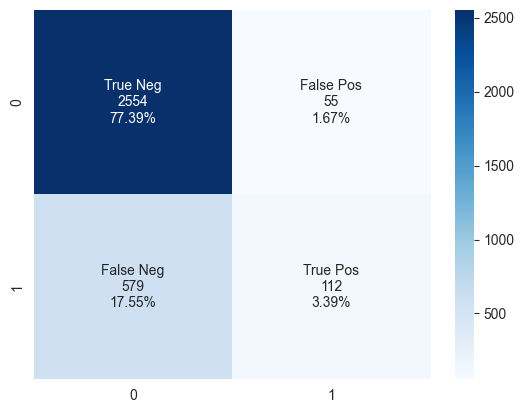

In [40]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(max_iter=1000)
print("Logistic regression model for imbalanced dataset")
classifier=model(classifier_lr,x_train,y_train)
model_evaluation(classifier,x_test,y_test)

logistic regression model for balanced dataset
Accuracy :  70.00%
ROC_AUC Score :  70.02%
#########  Confusion Matrix  ########
              precision    recall  f1-score   support

           0       0.68      0.71      0.70      2551
           1       0.72      0.69      0.70      2705

    accuracy                           0.70      5256
   macro avg       0.70      0.70      0.70      5256
weighted avg       0.70      0.70      0.70      5256

    ytest  ypred
0       0      1
1       1      1
2       1      1
3       1      0
4       1      1
5       0      0
6       0      1
7       0      0
8       1      0
9       1      0
10      1      1
11      1      1
12      1      0
13      0      0
14      0      0
15      0      0
16      0      0
17      1      0
18      1      1
19      0      0


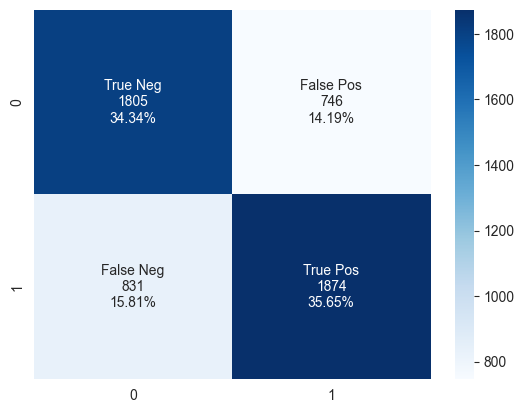

In [41]:
print("logistic regression model for balanced dataset")
classifier=model(classifier_lr,x_train_re,y_train_re)
model_evaluation(classifier,x_test_re,y_test_re)

GradientBoostingClassifier model for imbalanced dataset
Accuracy :  86.00%
ROC_AUC Score :  70.93%
#########  Confusion Matrix  ########
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2609
           1       0.79      0.45      0.57       691

    accuracy                           0.86      3300
   macro avg       0.83      0.71      0.75      3300
weighted avg       0.85      0.86      0.84      3300

    ytest  ypred
0       0      0
1       0      0
2       0      0
3       0      0
4       0      0
5       0      0
6       0      0
7       0      0
8       0      0
9       0      0
10      0      0
11      1      0
12      0      0
13      0      0
14      0      0
15      0      0
16      0      0
17      0      0
18      0      0
19      0      0


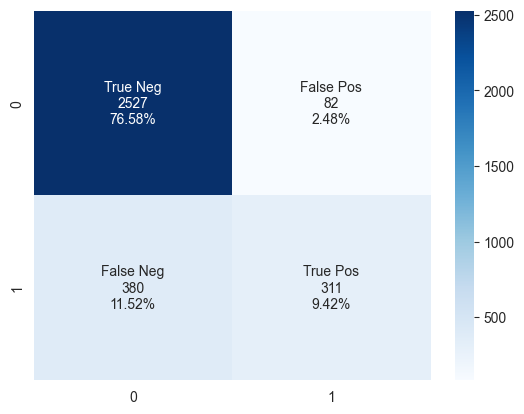

In [42]:
from sklearn.ensemble import  GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=100)
print("GradientBoostingClassifier model for imbalanced dataset")
classifier=model(gb,x_train,y_train)
model_evaluation(classifier,x_test,y_test)

GradientBoostingClassifier model for balanced dataset
Accuracy :  84.17%
ROC_AUC Score :  84.23%
#########  Confusion Matrix  ########
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      2551
           1       0.86      0.82      0.84      2705

    accuracy                           0.84      5256
   macro avg       0.84      0.84      0.84      5256
weighted avg       0.84      0.84      0.84      5256

    ytest  ypred
0       0      0
1       1      1
2       1      1
3       1      0
4       1      1
5       0      0
6       0      1
7       0      0
8       1      0
9       1      1
10      1      0
11      1      1
12      1      0
13      0      0
14      0      0
15      0      0
16      0      0
17      1      1
18      1      1
19      0      0


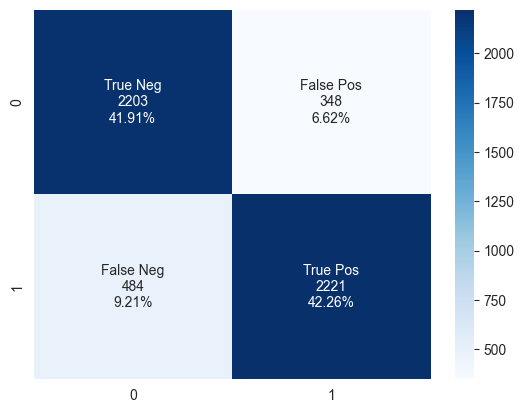

In [43]:
print("GradientBoostingClassifier model for balanced dataset")
classifier=model(gb,x_train_re,y_train_re)
model_evaluation(classifier,x_test_re,y_test_re)

RandomForestClassifier model for imbalanced dataset
Accuracy :  85.36%
ROC_AUC Score :  70.26%
#########  Confusion Matrix  ########
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2609
           1       0.76      0.44      0.56       691

    accuracy                           0.85      3300
   macro avg       0.81      0.70      0.74      3300
weighted avg       0.84      0.85      0.84      3300

    ytest  ypred
0       0      0
1       0      0
2       0      0
3       0      0
4       0      0
5       0      0
6       0      0
7       0      0
8       0      0
9       0      0
10      0      0
11      1      0
12      0      0
13      0      0
14      0      0
15      0      0
16      0      0
17      0      0
18      0      0
19      0      0


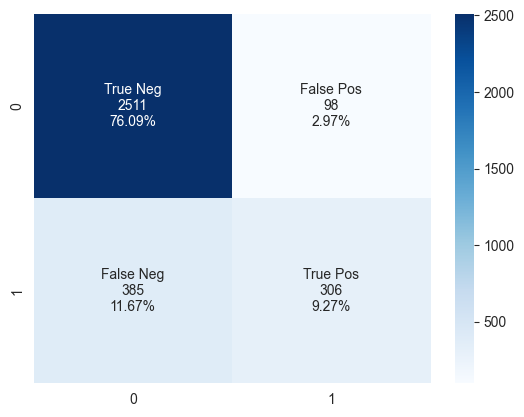

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state = 42)
print("RandomForestClassifier model for imbalanced dataset")
classifier=model(rf,x_train,y_train)
model_evaluation(classifier,x_test,y_test)

Random Forest Classifier model for balanced dataset
Accuracy :  87.46%
ROC_AUC Score :  87.49%
#########  Confusion Matrix  ########
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      2551
           1       0.89      0.86      0.88      2705

    accuracy                           0.87      5256
   macro avg       0.87      0.87      0.87      5256
weighted avg       0.88      0.87      0.87      5256

    ytest  ypred
0       0      0
1       1      1
2       1      1
3       1      0
4       1      1
5       0      0
6       0      1
7       0      0
8       1      1
9       1      1
10      1      1
11      1      1
12      1      1
13      0      0
14      0      0
15      0      0
16      0      0
17      1      1
18      1      1
19      0      0


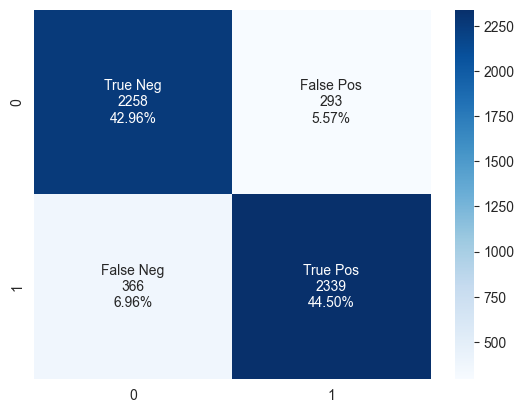

In [45]:
print("Random Forest Classifier model for balanced dataset")
classifier=model(rf,x_train_re,y_train_re)
model_evaluation(classifier,x_test_re,y_test_re)

In [46]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

ExtraTreesClassifier model for imbalanced dataset
Accuracy :  85.58%
ROC_AUC Score :  69.12%
#########  Confusion Matrix  ########
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2609
           1       0.81      0.41      0.54       691

    accuracy                           0.86      3300
   macro avg       0.83      0.69      0.73      3300
weighted avg       0.85      0.86      0.84      3300

    ytest  ypred
0       0      0
1       0      0
2       0      0
3       0      0
4       0      0
5       0      0
6       0      0
7       0      0
8       0      0
9       0      0
10      0      0
11      1      0
12      0      0
13      0      0
14      0      0
15      0      0
16      0      0
17      0      0
18      0      0
19      0      0


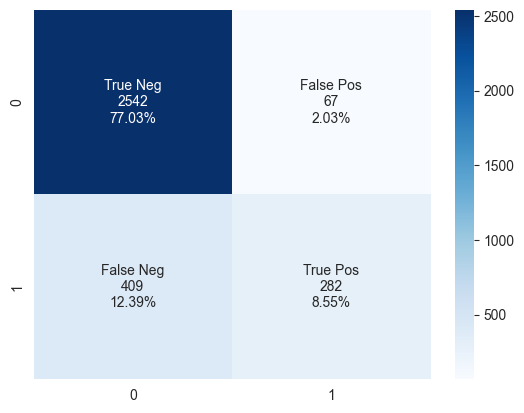

In [47]:
classifier_bg=ExtraTreesClassifier(n_estimators=300)
print("ExtraTreesClassifier model for imbalanced dataset")
classifier=model(classifier_bg,x_train,y_train)
model_evaluation(classifier,x_test,y_test)

ExtraTreesClassifier model for balanced dataset
Accuracy :  89.61%
ROC_AUC Score :  89.59%
#########  Confusion Matrix  ########
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2551
           1       0.90      0.90      0.90      2705

    accuracy                           0.90      5256
   macro avg       0.90      0.90      0.90      5256
weighted avg       0.90      0.90      0.90      5256

    ytest  ypred
0       0      0
1       1      1
2       1      1
3       1      0
4       1      1
5       0      0
6       0      1
7       0      0
8       1      1
9       1      1
10      1      1
11      1      1
12      1      1
13      0      0
14      0      0
15      0      0
16      0      0
17      1      1
18      1      1
19      0      0


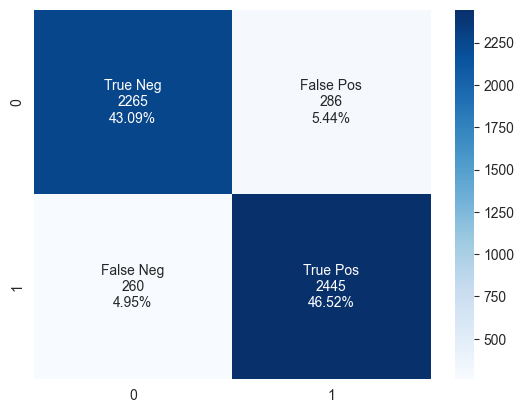

In [48]:
print("ExtraTreesClassifier model for balanced dataset")
classifier=model(classifier_bg,x_train_re,y_train_re)
model_evaluation(classifier,x_test_re,y_test_re)

In [49]:
type(x_train)

numpy.ndarray

In [50]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

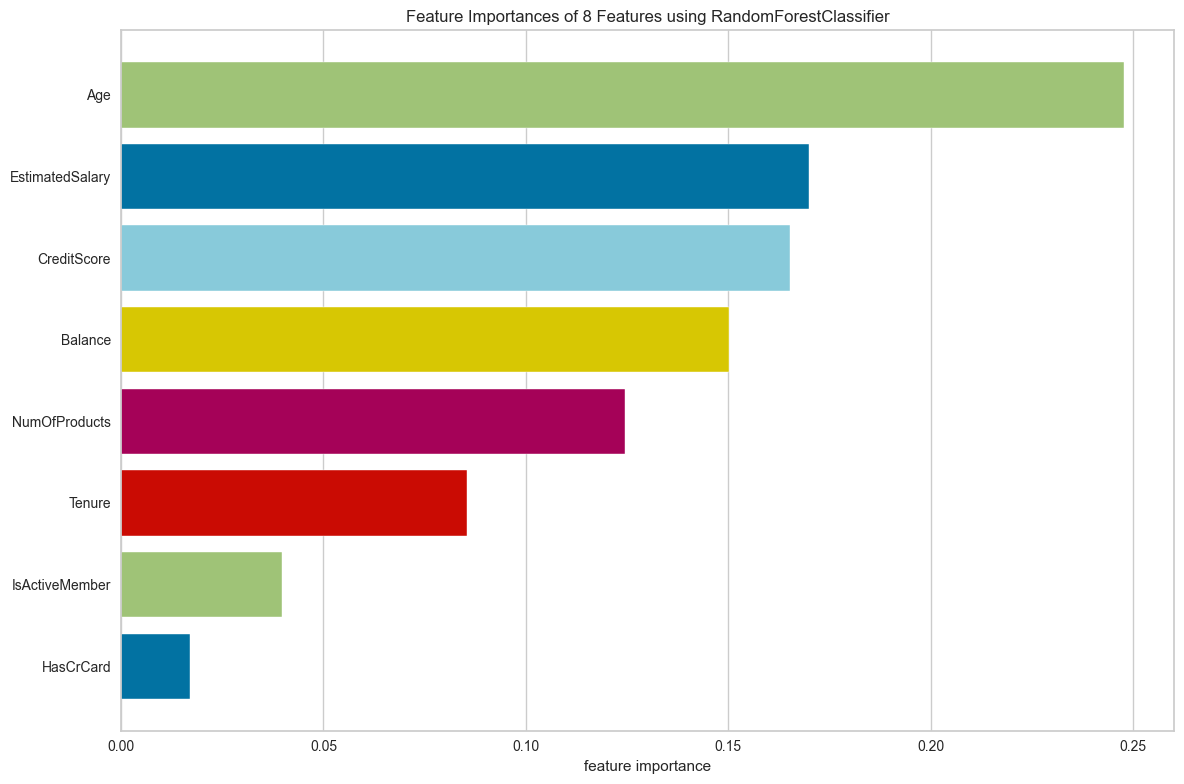

<Axes: title={'center': 'Feature Importances of 8 Features using RandomForestClassifier'}, xlabel='feature importance'>

In [52]:
from yellowbrick.model_selection import FeatureImportances
fig = plt.figure(figsize = (12,8))
viz = FeatureImportances(RandomForestClassifier(n_estimators=300), labels=df.columns, relative=False)
# Fit and show the feature importances
viz.fit(x_train,y_train)
viz.show()

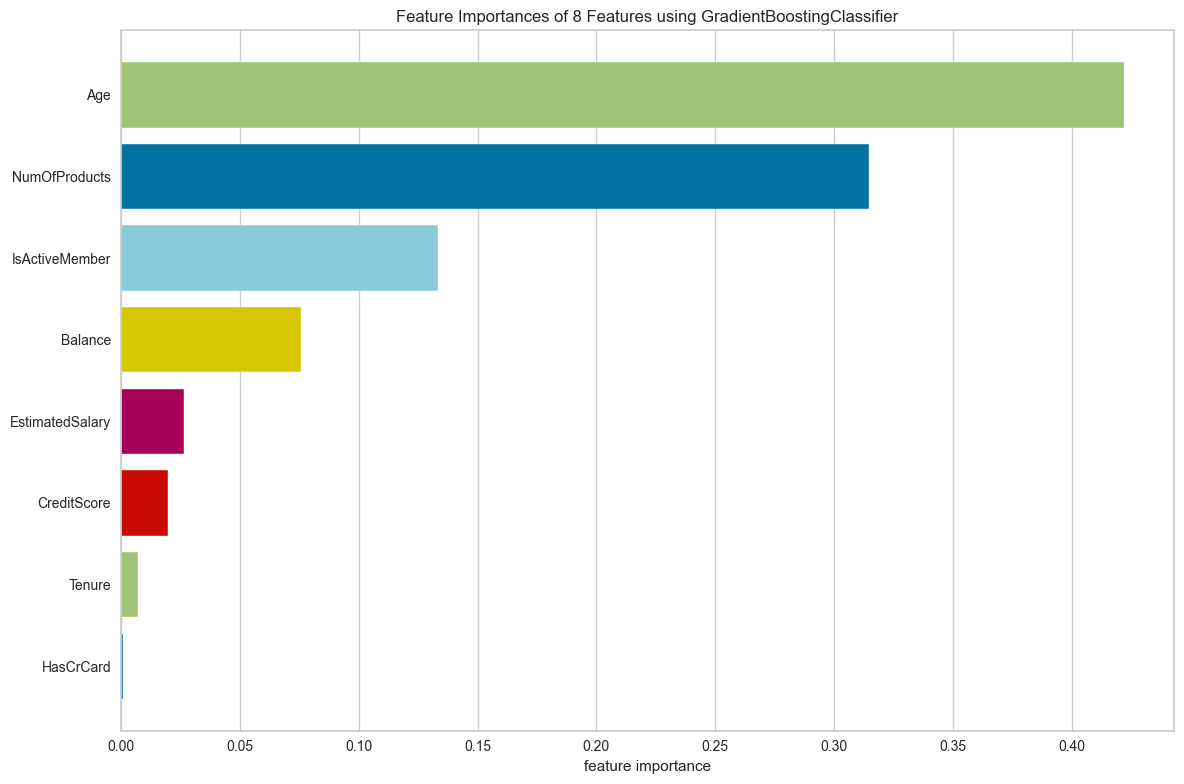

<Axes: title={'center': 'Feature Importances of 8 Features using GradientBoostingClassifier'}, xlabel='feature importance'>

In [53]:
fig = plt.figure(figsize = (12,8))
viz = FeatureImportances(GradientBoostingClassifier(n_estimators=100), labels=df.columns, relative=False)
# Fit and show the feature importances
viz.fit(x_train,y_train)
viz.show()